FAZENDO ANÁLISE EXPLORATÓRIA DO DATA 'tempo.csv'

In [36]:
#importando bibliotecas
import pandas as pd
import seaborn as srn
import statistics as sts

In [37]:
#primeiramente vamos analisar os dados e fazer anotação doq ue rpecisa ser corrigido

#lendo o arquivo 'tempo.csv' e armazenando numa variável para análise
dataset = pd.read_csv("tempo.csv", sep= ';')
dataset

,Aparencia,Temperatura,Umidade,Vento,Jogar
0,sol,85,85.0,FALSO,nao
1,sol,80,90.0,VERDADEIRO,nao
2,nublado,83,86.0,FALSO,sim
3,chuva,70,NaN,FALSO,sim
4,chuva,68,80.0,FALSO,sim
5,chuva,65,70.0,VERDADEIRO,nao
6,menos,64,65.0,VERDADEIRO,sim
7,sol,1220,95.0,FALSO,nao
8,sol,69,70.0,FALSO,sim
9,chuva,75,200.0,NaN,sim


In [38]:
#A tabela é pequena e daria para fazer análise visualmente, mas para fins didádicos vamos fazer a análise através de códigos passo a passo

#Análise dos dados categóricos
#Vamos começar analisando Aparência
#Necessária correção em valor fora do domínio 'menos' para a moda (chuva ou sol)
agrupado = dataset.groupby(["Aparencia"]).size()

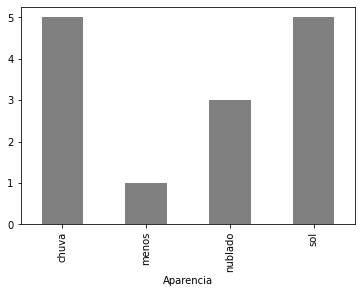

In [39]:
#Visualização gráfica de Aparencia
agrupado.plot.bar(color= 'gray')

In [40]:
#Agora vamos analisar o dado categórico Vento
#nenhum problema encontrado
dataset.groupby(["Vento"]).size()

Vento
FALSO         7
VERDADEIRO    6
dtype: int64

In [41]:
#analise do dado categórico Jogar
#nenhum problema encontrado
dataset.groupby(["Jogar"]).size()

Jogar
nao    5
sim    9
dtype: int64

In [42]:
#Analise de dados numéricos

#O primeiro dado numérico a ser analisado é Temperatura
#Correções necessárias na temperatura pois apresenta valor máximo de 1220, anormal para um dia terrestre
dataset["Temperatura"].describe()

count      14.000000
mean      155.571429
std       306.433759
min        64.000000
25%        69.250000
50%        73.500000
75%        80.750000
max      1220.000000
Name: Temperatura, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Temperatura')

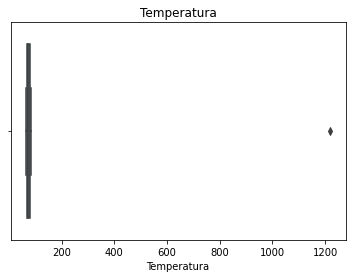

In [43]:
srn.boxplot(dataset["Temperatura"]).set_title("Temperatura")

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Temperatura')

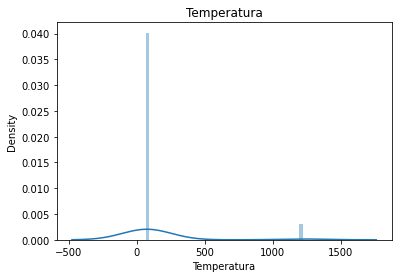

In [44]:
srn.distplot(dataset["Temperatura"]).set_title("Temperatura")

In [45]:
#Análise dos dados de Umidade
#Umidade precisa de alterações pois o valor máximo está em 200, a regra é estar ente 0 e 100
dataset["Umidade"].describe()

count     13.000000
mean      89.769231
std       34.540203
min       65.000000
25%       70.000000
50%       85.000000
75%       90.000000
max      200.000000
Name: Umidade, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Umidade')

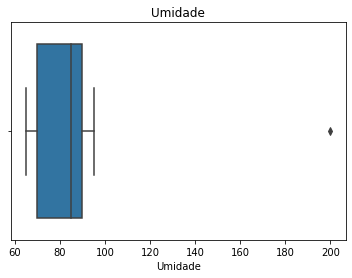

In [46]:
srn.boxplot(dataset["Umidade"]).set_title("Umidade")

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Umidade')

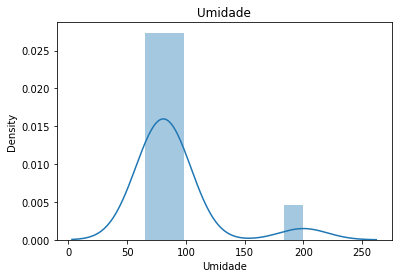

In [47]:
srn.distplot(dataset["Umidade"]).set_title("Umidade")

In [48]:
#verificando NaNs (valores não informados ou vazios)
dataset.isnull().sum()

Aparencia      0
Temperatura    0
Umidade        1
Vento          1
Jogar          0
dtype: int64

In [49]:
dataset.head()

,Aparencia,Temperatura,Umidade,Vento,Jogar
0,sol,85,85.0,FALSO,nao
1,sol,80,90.0,VERDADEIRO,nao
2,nublado,83,86.0,FALSO,sim
3,chuva,70,NaN,FALSO,sim
4,chuva,68,80.0,FALSO,sim


TRATADO DADOS E FAZENDO CORREÇÕES

In [50]:
#Preenchendo NaN (valores vazios ou não informados)

#Para preencher NaNs de valores numéricos substituimos pela mediana
#Para preencher NaNs de valores categóricos substituímos pela moda

#NaNs de Umidade
#calculando mediana de Umidade
mediana = sts.median(dataset["Umidade"])
mediana

85.5

In [51]:
#Preenchendo NaNs de Umidade
dataset["Umidade"].fillna(mediana, inplace= True)

#verificando se ainda há NaN em Umidade
dataset["Umidade"].isnull().sum()

0

In [52]:
#NaNs de Vento
#Calculando a moda
moda = sts.mode(dataset["Vento"])
moda

'FALSO'

In [53]:
#Preenchendo NaN de vento pela moda
dataset["Vento"].fillna(moda, inplace= True)

#verificando se há NaNs me Vento
dataset["Vento"].isnull().sum()

0

In [54]:
#Aparencia
#O problema encontrado em Aparencia é que o valor 'menos' foge do domínio
#vamos substituílo pela moda 'sol'

dataset.loc[dataset["Aparencia"] == "menos", "Aparencia"] = "sol"

#verificando se foi corrigido
dataset.groupby(["Aparencia"]).size()

Aparencia
chuva      5
nublado    3
sol        6
dtype: int64

In [55]:
#Temperatura
#Em temperatura é que os valores devem estar entre -130 e 130

#calculando a mediana de temperatura
mediana = sts.median(dataset["Temperatura"])
mediana

73.5

In [56]:
#substituindo valores que fogem do range pela mediana
dataset.loc[(dataset["Temperatura"] < -130) | (dataset["Temperatura"] > 130),"Temperatura"] = mediana

#verificando se ainda há valores errados
dataset.loc[(dataset["Temperatura"] < -130) | (dataset["Temperatura"] > 130), "Temperatura"].sum()

0.0

In [57]:
#Umidade 
#Em umidade temos que os valores devem estar entre 0 e 100, então vamos substituir pela mediana

#calculando mediana de Umidade
mediana = sts.median(dataset["Umidade"])
mediana

85.25

In [58]:
#susbtituindo valores que fogem da regra pela mediana
dataset.loc[(dataset["Umidade"] < 0) | (dataset["Umidade"] > 100), "Umidade"] = mediana

#verificando se ainda tem valores que fogem da regra
dataset.loc[(dataset["Umidade"] < 0) | (dataset["Umidade"] > 100), "Umidade"].sum()

0.0

In [59]:
dataset

,Aparencia,Temperatura,Umidade,Vento,Jogar
0,sol,85.0,85.00,FALSO,nao
1,sol,80.0,90.00,VERDADEIRO,nao
2,nublado,83.0,86.00,FALSO,sim
3,chuva,70.0,85.50,FALSO,sim
4,chuva,68.0,80.00,FALSO,sim
5,chuva,65.0,70.00,VERDADEIRO,nao
6,sol,64.0,65.00,VERDADEIRO,sim
7,sol,73.5,95.00,FALSO,nao
8,sol,69.0,70.00,FALSO,sim
9,chuva,75.0,85.25,FALSO,sim


In [60]:
#Parabéns, todos os dados foram tratados e limpos!